# ¿Cómo debemos fijar el precio de las casas en Seattle?

In [1]:
# Ignore user warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

# Librerias basicas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

%matplotlib inline
plt.style.use('ggplot')

## Introducción

**Contexto comercial.** Una gran empresa de bienes raíces lo contrató como científico de datos en su oficina de Seattle. Su trabajo es ayudar a los residentes de Seattle que deseen vender su casa a determinar un precio óptimo para vender su propiedad a fin de maximizar sus ingresos y al mismo tiempo encontrar compradores dispuestos. Para ello, a la empresa le gustaría que construyera un modelo de fijación de precios para bienes raíces en Seattle, a fin de maximizar la probabilidad de ayudar a los residentes a cerrar ventas (y, por lo tanto, maximizar las comisiones para la empresa).

**Problema comercial.** Su tarea es **crear un modelo que use datos de ventas anteriores en Seattle para recomendar un precio de venta óptimo para cualquier propiedad en particular**.

**Contexto analítico.** El conjunto de datos proporcionado se obtuvo de Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction) e incluye precios de venta de casas en el estado de Washington (condado de King, donde se encuentra Seattle) entre Mayo de 2014 y mayo de 2015. Como hemos aprendido, la principal herramienta para predecir una variable de respuesta es el modelo de regresión múltiple. Sin embargo, a veces nuestros datos no cumplen los supuestos de un modelo lineal. Aprenderemos un conjunto de estrategias para mitigar algunos problemas comunes que aparecen durante el análisis de regresión.

El caso está estructurado de la siguiente manera: usted (1) realizará una EDA básica de algunas de las variables para determinar que la regresión lineal estándar no es suficiente; (2) aprender acerca de las transformaciones de variables y usarlas para mejorar el modelo inicial; y finalmente (3) aprender a incorporar efectos de interacción (que son en sí mismos una forma de transformación variable que involucra dos o más variables) en nuestro modelo.

## Exploracion de data

Revisemos los datos que tenemos:

1. **id**: identification for a house
2. **date**: date house was sold
3. **price**: price house was sold at
4. **bedrooms**: number of bedrooms
5. **bathrooms**: number of bathrooms
6. **sqft_living**: square footage of the home
7. **sqft_lot**: square footage of the lot
8. **floors**: total floors (levels) in house
9. **waterfront**: whether or not the house has a view of a waterfront
10. **view**: whether or not the house has been viewed
11. **condition**: how good the condition of the house is
12. **grade**: overall grade given to the housing unit, based on King County grading system
13. **sqft_above**: square footage of the house apart from basement
14. **sqft_basement**: square footage of the basement
15. **yr_built**: year house was built
16. **yr_renovated**: year house was renovated
17. **zipcode**: zipcode of the house
18. **lat**: latitude coordinate of the house
19. **long**: longitude coordinate of the house

In [2]:
houses = pd.read_csv('kc_house_data.csv')

In [3]:
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Ejercicio 1

Analice la distribución de los precios de la vivienda utilizando `.describe()`, un gráfico QQ y un gráfico de histograma. ¿Parece gaussiano?

In [4]:
houses['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

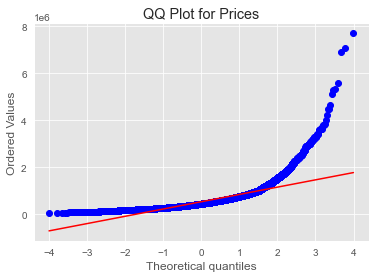

In [5]:
## QQ plot del price
stats.probplot(houses['price'], dist = "norm", plot = plt)
plt.title("QQ Plot for Prices")
plt.show()

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of prices')

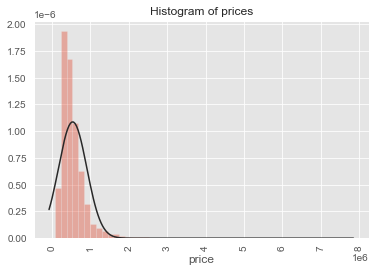

In [6]:
## histograma del precio
#sns.distplot(houses['price'],fit=stats.laplace, kde=False)
sns.distplot(houses['price'],fit=stats.norm, kde=False)
sns.set(color_codes=True)
plt.xticks(rotation=90)
plt.title("Histogram of prices")

La distribución no parece gaussiana. Mirando tanto el gráfico QQ como el histograma, podemos ver que la distribución de nuestros datos está muy sesgada.

### Ejercicio 2

Analice la relación entre los precios de la vivienda y el precio por pie cuadrado de espacio habitable. ¿Qué puedes concluir? (Sugerencia: use la función `lmplot()` en la biblioteca `seaborn`).

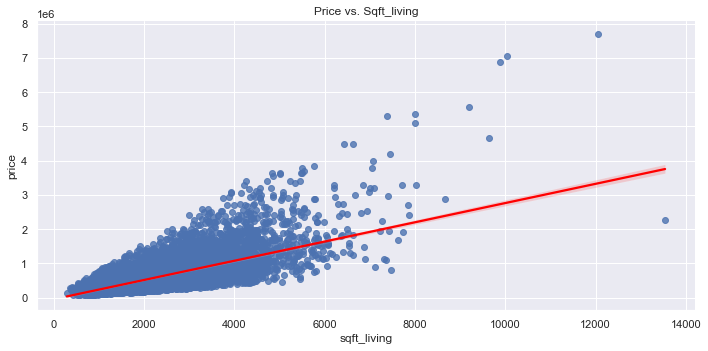

In [7]:
## relacion lineal entre sqft_living y price
sns.lmplot(x='sqft_living',y='price',data=houses, 
           line_kws = {'color': "red"} ,aspect= 2)
plt.title("Price vs. Sqft_living");

Dada la forma en que el precio de la vivienda frente al precio por pie cuadrado parece tener un efecto de "fan out", vemos que la relación no parece ser lineal. De hecho, no es inmediatamente obvio qué tipo de relación se exhibe aquí.

## Transformacion de variables

Hemos visto en el Ejercicio 1 que la distribución de los precios de la vivienda no es gaussiana, y que esto puede estar contribuyendo al efecto de "abanico" que observamos en el Ejercicio 2. Queremos encontrar una manera de eliminar el efecto de "abanico", ya que implica que un ajuste lineal se vuelve cada vez menos adecuado, con una varianza cada vez mayor de la línea de mejor ajuste para valores grandes de las variables predictoras y de respuesta. Un método común para abordar este problema es transformar la variable de respuesta y/o la variable predictora. Tal **transformación de variable** implica aplicar una función conocida a una o más de estas variables para lograr condiciones que sean adecuadas para la aplicación de un modelo lineal.

Las funciones matemáticas típicas utilizadas para transformar variables incluyen potencias (cuadráticas, cúbicas, raíces cuadradas, etc.), logaritmos y funciones trigonométricas. Comencemos con la transformación logarítmica para ver si podemos lograr algunos resultados.

### Ejercicio 3

Tome el logaritmo de los precios de la vivienda y cree gráficos para determinar si esto hace que la distribución de la variable transformada sea aproximadamente gaussiana.

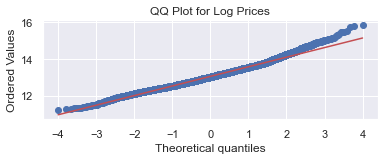

C:\Users\Windows\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of prices')

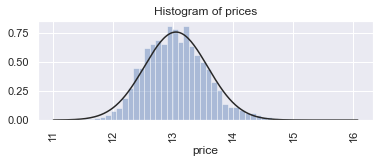

In [8]:
## QQ plot del price
plt.subplot(2,1,1)
stats.probplot(np.log(houses['price']), dist = "norm", plot = plt)
plt.title("QQ Plot for Log Prices")
plt.show()
plt.subplot(2,1,2)
sns.distplot(np.log(houses['price']),fit=stats.norm, kde=False)
sns.set(color_codes=True)
plt.xticks(rotation=90)
plt.title("Histogram of prices")

In [9]:
np.log(houses['price']).describe()

count    21613.000000
mean        13.047817
std          0.526685
min         11.225243
25%         12.682152
50%         13.017003
75%         13.377006
max         15.856731
Name: price, dtype: float64

Podemos ver tanto en el gráfico QQ como en el histograma que la distribución es mucho más cercana a la normal.

### Construcción de un modelo lineal con variables transformadas 

Por supuesto, no solo estamos restringidos a aplicar la transformación logarítmica a los precios de la vivienda; podemos hacerlo con cualquier otra variable en nuestro conjunto de datos. Transformemos los precios de la vivienda y el precio por pie cuadrado con este método e interpretemos el modelo lineal resultante:

In [10]:
mod1 = smf.ols(formula='np.log(price) ~ np.log(sqft_living)', data=houses).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:07:35   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7299    

Tenemos que ser conscientes de cómo interpretamos los coeficientes. Aunque podríamos decir que nuestros resultados nos dicen que un aumento de 1 unidad en el logaritmo del espacio habitable resultará en un aumento de 0.836 en el logaritmo del precio, esta es una interpretación muy mecánica y nada intuitiva.

Las matemáticas pueden ayudarnos a llegar a una interpretación más intuitiva. Tenga en cuenta que el ajuste que ha obtenido nuestro modelo anterior es $ \log price = 0.84 * \log sqft\_{living} + 6.73$. Exponenciando ambos lados, obtenemos $price = e^{6.73} * sqft\_living^{0.84}$. Esta es una relación no lineal, por lo que no es tan sencilla como "aumentar `sqft_living` en 1 significa que `price` sube en X".

Sin embargo, podemos intentar reformular esto en términos porcentuales; es decir, ¿cómo afecta el precio un aumento del 1 por ciento en `sqft_living`? Podemos reemplazar $sqft\_{living0} = 1.01 * sqft\_{living}$ en esta ecuación para obtener $price_0 = e^{6.73} * 1.01^{0.84} * sqft\_living^{0.84} = 1.01^{0.84} * price \approx 1.0084 * price$; es decir, un aumento del 1 por ciento en el espacio habitable da como resultado un aumento del precio del 0,84 por ciento. Esta comparación de cambio de porcentaje frente a porcentaje se conoce como **elasticidad**.

Ahora construyamos un modelo lineal donde la transformada logarítmica solo se aplica a los precios de la vivienda:

In [11]:
mod2 = smf.ols(formula='np.log(price) ~ sqft_living', data=houses).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:11:53   Log-Likelihood:                -9670.2
No. Observations:               21613   AIC:                         1.934e+04
Df Residuals:                   21611   BIC:                         1.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2185      0.006   1916.883      

La interpretación del coeficiente de regresión vuelve a ser diferente. Interpretamos el coeficiente como una **semi-elasticidad**, donde un aumento absoluto en `sqft_living` (porque no se le ha aplicado la función logarítmica) corresponde a un aumento porcentual en `precio`. Específicamente, aquí podemos decir que un aumento en el espacio habitable de 1 pie cuadrado conduce a un aumento del precio del 0.04 % por ciento.

### Ejercicio 4

Utilizando la función `sns.lmplot()`, determine cuál de los dos modelos anteriores es "más lineal".

In [12]:
houses['log_price'] = np.log(houses['price'])
houses['log_sqft_living'] = np.log(houses['sqft_living'])

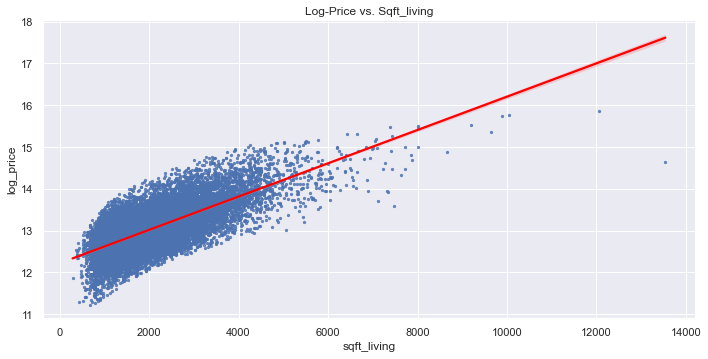

In [13]:
## relacion lineal entre sqft_living y log-price
sns.lmplot(x='sqft_living',y='log_price',data=houses, 
           line_kws = {'color': "red"} ,aspect= 2, scatter_kws={"s": 5})
plt.title("Log-Price vs. Sqft_living");

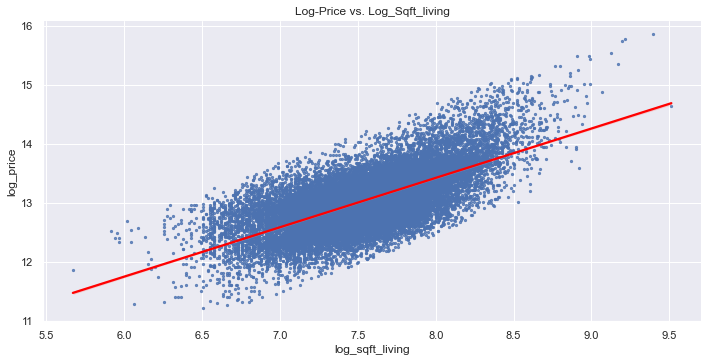

In [14]:
## relacion lineal entre log-sqft_living y log-price
sns.lmplot(x='log_sqft_living',y='log_price',data=houses, 
           line_kws = {'color': "red"} ,aspect= 2, scatter_kws={"s": 5}) 
plt.title("Log-Price vs. Log_Sqft_living");

Podemos ver en estos gráficos que los puntos de datos del modelo logarítmico se agrupan de manera más uniforme alrededor de la línea de mejor ajuste en diferentes niveles de la variable predictora en comparación con el otro modelo, lo que sugiere que el modelo logarítmico es más lineal.

### Transformacion Box-Cox 

Las transformaciones logarítmicas son solo una de las posibles transformaciones que discutimos. Anteriormente, mencionamos potencias (por ejemplo, cuadrados, cubos, raíces cuadradas, etc.) así como funciones trigonométricas. En algunos casos, elegir una transformación puede ser sencillo (por ejemplo, el logaritmo porque es fácilmente interpretable); otras veces, es mucho más difícil. Una forma formal de decidir qué transformación utilizar es estimar el coeficiente $\lambda$ de la transformación de Box-Cox:

$$BC(\lambda) = \frac{Y^\lambda-1}{\lambda} $$

Si la estimación de $\lambda$ es cercana a 2, podemos usar la transformación cuadrática; si es cercano a 0,5, la transformación de raíz cuadrada; si es cercano a cero o menor que cero (negativo), la transformación logarítmica; etc. En nuestro caso, tenemos:

In [15]:
price,fitted_lambda = stats.boxcox(houses['price'])
round(fitted_lambda,2)

-0.23

Esto es menor que cero, por lo que parece sensato usar la transformación logarítmica.

## Regresion lineal multiple con varias variables transformadas

Por supuesto, como hemos visto en el caso anterior, no tiene sentido restringirnos a modelar los precios de la vivienda basados en una sola variable predictora. Agreguemos varias variables más, algunas transformadas y otras no:

### Ejercicio 5

Ajustar un modelo lineal para log `price` vs. log `sqft_living`, log `sqft_lot`, `bedrooms`, `floors`, `bathrooms`, `waterfront`, `condition`, `view`, `grade`, `yr_built`, `lat`, and `long`. Proveer las interpretacion de los coeficientes de log `sqft_living` and `waterfront`.

In [16]:
mod3 = smf.ols (formula = 'np.log(price) ~ np.log(sqft_living)+ np.log(sqft_lot) +bedrooms + floors + \
                bathrooms +waterfront + condition + waterfront + view + grade + yr_built + lat + long ', data = houses).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     5772.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:15:23   Log-Likelihood:                -1284.6
No. Observations:               21613   AIC:                             2595.
Df Residuals:                   21600   BIC:                             2699.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -39.9251    

Todas las variables son estadísticamente significativas (todas $p$ - valores inferiores a 0.01). En general, este modelo lineal explica más del 76 por ciento de la variabilidad total de la variable de respuesta.

Un aumento del uno por ciento en el espacio habitable conduce a un aumento del 0.4096 por ciento en el precio. Una propiedad con vista al agua tiene un aumento en el precio del 39.11 por ciento.


¿Qué otros factores pueden afectar el precio que hemos omitido? Algunos que pueden desempeñar un papel incluyen la proximidad a los servicios (hospitales, escuelas, áreas comerciales, cines, paradas de metro...), índices de criminalidad, etc. Nuestro conjunto de datos no tiene una lista completa de posibles factores; sin embargo, tenemos algunas variables que sería interesante investigar más a fondo.

En general, los precios de la vivienda cambian según la ubicación. Dos casas con características comparables pueden tener un precio muy diferente según el vecindario y la posición geográfica. En este conjunto de datos, tenemos código postal y coordenadas geográficas. Empecemos echando un vistazo a la relación entre latitud y precios.


### Ejercicio 6

Examine la relación entre la latitud y el logaritmo de los precios de la vivienda. ¿Qué observas?

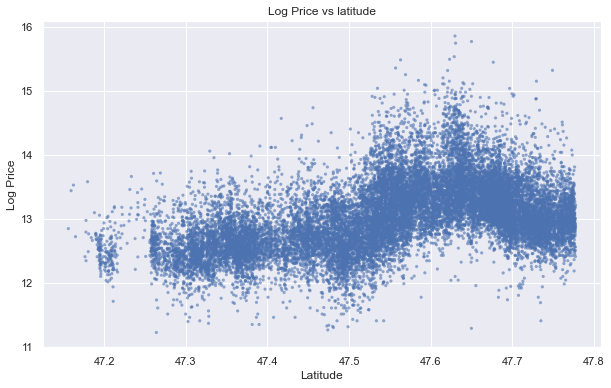

In [18]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.scatter(houses['lat'],np.log(houses['price']),c ='b',alpha=0.6,edgecolors='none',s=10)
plt.xlabel("Latitude")
plt.ylabel("Log Price")
ax.set_title("Log Price vs latitude")
plt.show();

Podemos ver que existe una relación no lineal entre latitud y precio. Basado en la curvatura cóncava en la mitad derecha de la gráfica anterior, parece que agregar un término cuadrático podría ayudarnos a explicar esto.

### Ejericico 7

Agregue el cuadrado de la latitud como predictor adicional al modelo del ejercicio 5. ¿Es significativo el término? Utilice la puntuación AIC (descrita a continuación) para evaluar si el ajuste ha mejorado o no.

**Antecedentes de la puntuación AIC:** Uno de los inconvenientes de $R^2$ es que nunca puede disminuir cuando aumenta el conjunto de predictores. En otras palabras, no hay penalización por seguir agregando variables que tienen poco poder explicativo. En consecuencia, seleccionar variables predictoras que intenten maximizar $R^2$ puede llevar a elegir modelos innecesariamente complejos y redundantes. ¿Cómo elegimos un modelo que ofrece una buena calidad de ajuste y minimiza la cantidad de características?

Hay varios criterios de selección de modelos que cuantifican la calidad de un modelo mediante la gestión de la compensación entre la bondad de ajuste y la simplicidad. El más común es el AIC (Akaike Information Criterion). El AIC penaliza la adición de más términos a un modelo, por lo que para que un modelo actualizado tenga un mejor AIC, su $R^2$ debe mejorar al menos tanto como la penalización adicional impuesta. Cuanto menor sea el AIC de un modelo, mayor será su calidad.

Por ahora, no se preocupe por los detalles técnicos detrás de AIC (aunque puede buscarlos tu mismo). En futuros casos sobre **regularización**, aprenderá más sobre la razón de por qué estos tipos de estimadores son importantes y cómo construirlos y usarlos en la construcción de modelos.



In [19]:
## lat square effect
mod4 = smf.ols ( formula = 'np.log(price) ~ np.log(sqft_living)+ np.log(sqft_lot) +bedrooms + floors + \
bathrooms +waterfront + condition + waterfront + view + grade + yr_built + lat + I(lat**2) + long ', data = houses  ).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     5816.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:17:49   Log-Likelihood:                -554.41
No. Observations:               21613   AIC:                             1137.
Df Residuals:                   21599   BIC:                             1249.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -7773.2083    

In [20]:
print(mod3.aic)

2595.253434278762


In [21]:
print(mod4.aic)

1136.814316941236


Podemos ver que el coeficiente es altamente significativo. El R-cuadrado ha aumentado alrededor de un 1%. Comparando el modelo 3 y el modelo 4 podemos ver que el AIC ha mejorado de 2597.253 a 1138.814.

Agreguemos el codigo zip al modelo a ver que ocurre:

In [22]:
## location effect con variables dummy
mod5 = smf.ols ( formula = 'np.log(price) ~ np.log(sqft_living)+ np.log(sqft_lot) +bedrooms + \
floors + bathrooms +waterfront + condition + waterfront + view + grade + yr_built + lat + I(lat**2) + long + C(zipcode)', data = houses  ).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1910.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:18:32   Log-Likelihood:                 6026.8
No. Observations:               21613   AIC:                        -1.189e+04
Df Residuals:                   21530   BIC:                        -1.123e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5882.6548    

A partir de la salida, podemos ver cuántos de los diferentes códigos postales ejercen un efecto significativo. El R-cuadrado del modelo ha aumentado dramáticamente a 87.92%.

## Modelando efectos de interaccion

Como hemos visto durante los casos de EDA, los efectos de interacción pueden complicar el efecto percibido de las variables predictoras sobre el resultado de interés. Profundicemos en las interacciones potenciales mirando tres de los predictores en tándem: `waterfront`, posición geográfica (`lat` y `long`) y `sqft_living`. Específicamente, ¿el efecto de la posición geográfica y `sqft_living` es diferente entre las casas que tienen vista frente al mar y las que no?

Para estudiar este efecto de interacción, ajustemos dos líneas de regresión separadas para cada subgrupo (aquí, los dos subgrupos tienen o no frente al mar):

Text(0.5, 1.0, 'Log-price vs. Latitude')

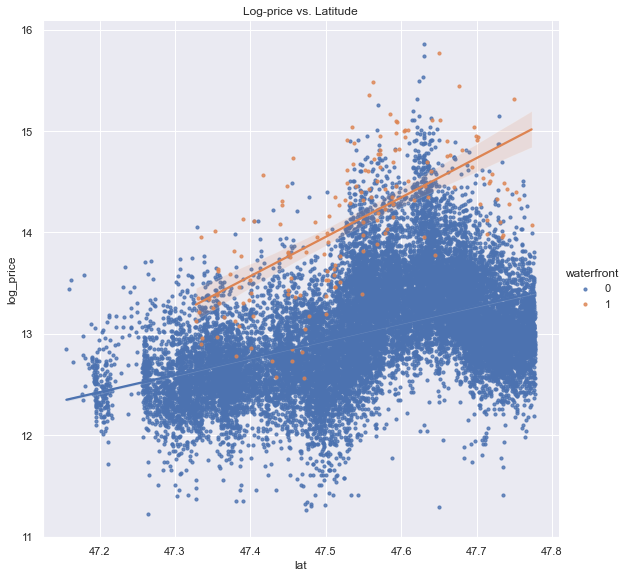

In [23]:
sns.lmplot(x = 'lat', y= 'log_price',data = houses, 
           hue="waterfront", height=8, scatter_kws={"s": 10})
plt.title("Log-price vs. Latitude")

Text(0.5, 1.0, 'Log-price vs. Log_Sqft_living')

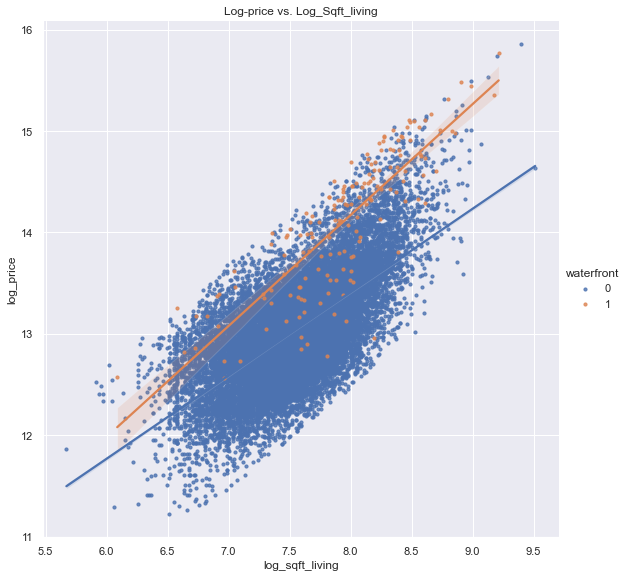

In [24]:
sns.lmplot(x='log_sqft_living', y='log_price',data=houses, 
           hue="waterfront", height=8, scatter_kws={"s": 10})
plt.title("Log-price vs. Log_Sqft_living")

Vemos que los efectos de `latitude` y el logaritmo de `sqft_living` son más pronunciados para el subgrupo de casas con vista al mar.

### Ejercicio 8

Usando la función `lmplot()` en `seaborn`, crea un diagrama de regresión del logaritmo de `price` vs. el logaritmo de `sqft_living`, interactuando con el número de dormitorios. ¿Qué patrones observas?

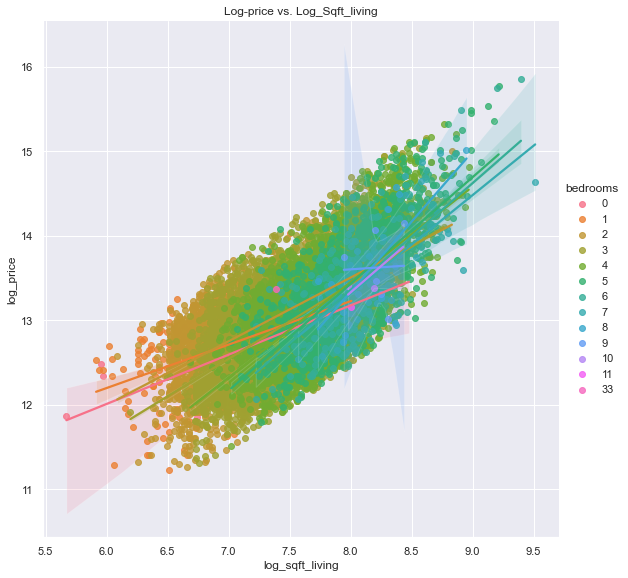

In [25]:
sns.lmplot(x = 'log_sqft_living', y= 'log_price',data = houses, hue="bedrooms", height=8)
plt.title("Log-price vs. Log_Sqft_living");

No hay un patrón monótono claro en la pendiente de la línea de regresión a medida que aumenta el número de dormitorios, por lo que diremos que el número de dormitorios *no* interactúa con la relación entre precio y pies cuadrados.

### Ejercicio 9

Cree un diagrama de regresión para ver si el estado de renovación de una casa interactúa con la relación entre el logaritmo de `price` y el logaritmo de `sqft_living`. ¿Qué puedes concluir?

In [26]:
houses['renovated'] = houses['yr_renovated'] >0

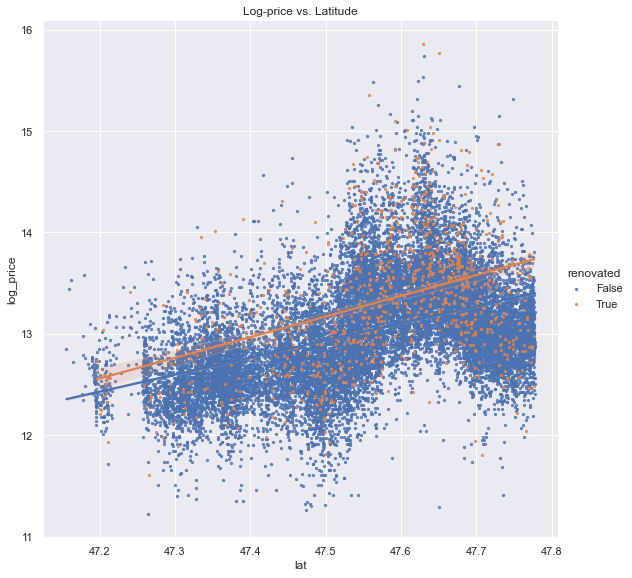

In [27]:
sns.lmplot(x = 'lat', y= 'log_price',data = houses, hue="renovated", height=8, scatter_kws={"s": 5});
plt.title("Log-price vs. Latitude");

Text(0.5, 1.0, 'Log-price vs. Log_Sqft_living')

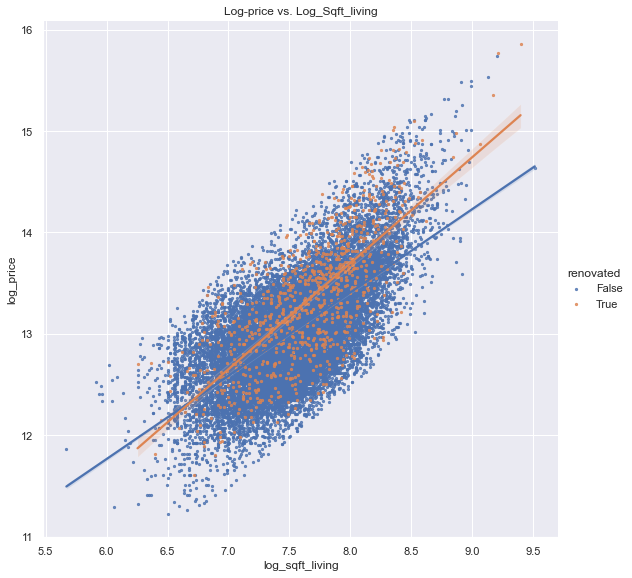

In [28]:
sns.lmplot(x = 'log_sqft_living', y= 'log_price',data = houses, 
           hue="renovated", height=8, scatter_kws={"s": 5})
plt.title("Log-price vs. Log_Sqft_living")

Podemos ver que la relación entre el predictor y las variables de resultado es más pronunciada para las casas que han sido renovadas.

Verificar por medio del modelo lineal

In [29]:
formula = ('np.log(price) ~ lat*C(waterfront)')
mod5_1 = smf.ols(formula=formula, data=houses).fit()
print(mod5_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2228.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:21:25   Log-Likelihood:                -13898.
No. Observations:               21613   AIC:                         2.780e+04
Df Residuals:                   21609   BIC:                         2.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -68

In [30]:
formula = ('np.log(price) ~ np.log(sqft_living)*C(waterfront)')
mod5_2 = smf.ols(formula=formula, data=houses).fit()
print(mod5_1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2228.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:21:32   Log-Likelihood:                -13898.
No. Observations:               21613   AIC:                         2.780e+04
Df Residuals:                   21609   BIC:                         2.784e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -68

Para el modelo de latitud (mod5_1) la diferencia entre las dos intersecciones es -102.303 y la diferencia entre las dos pendientes es 2.175. Ambos son estadísticamente significativos, como podemos concluir a partir de los valores p muy pequeños.
Para el modelo de registro de pies cuadrados (mod5_2), la diferencia entre las dos intersecciones es -1.415 y la diferencia entre las dos pendientes es 0.272. También en este caso ambos son estadísticamente significativos, como podemos concluir a partir de los valores p muy pequeños. Podemos concluir que existe un efecto de interacción significativo entre el efecto de la posición geográfica y el tamaño de la casa cuando se comparan las propiedades con y sin vista al mar. En particular, el precio de las casas frente al mar aumenta más rápido con el tamaño y la latitud.


### Incorporar efectos de interaccion al modelo lineal

Por supuesto, la metodología anterior es muy ineficiente por dos razones:

1. Solo puede incorporar un efecto de interacción a la vez.
2. Requiere ajustar modelos de regresión lineal múltiple, según el valor o valores del término que interactúa.

Comencemos con nuestro modelo base que incluye todas las demás variables que hemos discutido antes, junto con efectos fijos separados para `waterfront` y `renovated` (pero sin interacción):

In [31]:
formula = ('np.log(price) ~ np.log(sqft_living)+ np.log(sqft_lot) + bedrooms + floors + bathrooms '
           '+ waterfront + condition + C(waterfront) + view + grade + yr_built + lat + I(lat**2) '
           '+ long + C(zipcode)+ C(renovated)')
mod6 = smf.ols(formula=formula, data=houses).fit()
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1894.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:23:07   Log-Likelihood:                 6064.5
No. Observations:               21613   AIC:                        -1.196e+04
Df Residuals:                   21529   BIC:                        -1.129e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6000.5172 

In [32]:
##efecto de una vista frente al mar diferente para casas que fueron renovadas recientemente
formula = ('np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms + floors + bathrooms '
           ' + condition + view + grade + yr_built + lat*C(waterfront) + I(lat**2) '
           '+ long + C(zipcode)')
mod7 = smf.ols (formula=formula, data=houses).fit()
print(mod7.summary()) 

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1855.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:23:36   Log-Likelihood:                 6088.9
No. Observations:               21613   AIC:                        -1.201e+04
Df Residuals:                   21527   BIC:                        -1.132e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [33]:
print(mod7.aic)

-12005.868261995849


Podemos ver que tanto el efecto como las reformas tienen un impacto positivo en el precio. El efecto de una vista frente al mar es del 46.25 por ciento en los precios de viviendas comparables, mientras que el efecto de las renovaciones es del 5.794 por ciento. Hasta ahora hemos analizado los efectos globales de los predictores, independientemente de los niveles de las demás variables. Sin embargo, podríamos preguntar, ¿el efecto de una vista frente al mar es diferente para las casas que fueron renovadas recientemente? Para responder a esta pregunta necesitamos agregar un término de interacción.

In [34]:
formula = ('np.log(price) ~ np.log(sqft_living)*waterfront + np.log(sqft_living)*renovated + np.log(sqft_lot)' 
           '+ bedrooms + floors + bathrooms '
           '+ waterfront + condition + view + grade + yr_built + lat + I(lat**2) + long + C(zipcode)')
mod8= smf.ols(formula=formula, data=houses).fit()
print(mod8.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1851.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:24:08   Log-Likelihood:                 6068.8
No. Observations:               21613   AIC:                        -1.197e+04
Df Residuals:                   21527   BIC:                        -1.128e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [35]:
print(mod8.aic)

-11965.547861904757


### Ejercicio 10

Nuestro modelo de referencia (mod7) contenía los siguientes predictores:
`bedrooms`,`floors`, `bathrooms`,`condition`,`view`,`grade`,`yr_built`, `long`, `log(sqft_living) * C(renovated)`, `lat * C(waterfront)`, `I(lat**2)`, `log(sqft_lot)` and `C(zipcode)`. El AIC para este modelo fue $-12005.86$ y el R2 es $0.8798$.

Expanda este modelo anterior haciendo lo siguiente:

1. Agregue un término que represente el cuadrado del año en que se construyó la casa
2. Agregar un término de interacción para la presencia de un sótano que afecta la relación entre la coordenada de longitud y el precio de una casa

Compare el ajuste del modelo y AIC con el modelo anterior.

In [36]:
formula = ('np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms + floors + bathrooms '
           '+ condition + view + grade + yr_built + lat*C(waterfront) + I(lat**2) + long + C(zipcode)'
           '+ I(yr_built**2)')
mod9 = smf.ols(formula=formula, data=houses).fit()
print(mod9.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1899.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:25:25   Log-Likelihood:                 6428.5
No. Observations:               21613   AIC:                        -1.268e+04
Df Residuals:                   21526   BIC:                        -1.199e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [37]:
print(mod9.aic)

-12682.956456736174


In [38]:
# variable ficticia construida para separar casas con sótano y casas sin sótano
houses['has_basement'] = (houses['sqft_basement'] > 0) * 1.0

In [39]:
# estimar un modelo con una interacción entre la coordenada de longitud y la presencia de un basamento.
formula = ('np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms + floors + bathrooms '
           '+ condition + view + grade + yr_built + lat * C(waterfront) + I(lat**2) + long + C(zipcode) '
           '+ has_basement * long')
mod10 = smf.ols(formula=formula, data=houses).fit()
print(mod10.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1833.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:26:05   Log-Likelihood:                 6199.6
No. Observations:               21613   AIC:                        -1.222e+04
Df Residuals:                   21525   BIC:                        -1.152e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Los efectos son significativos en ambos casos. Ambos modelos mejoran el ajuste de nuestros modelos de referencia, pero la adición de un término cuadrado en el año de construcción tiene un impacto más fuerte en comparación con la interacción entre el sótano y la longitud.

In [40]:
# resultados de R2
r7 = mod7.rsquared
r9 = mod9.rsquared
r10 = mod10.rsquared

# resultados aic
aic7 = mod7.aic
aic9 = mod9.aic
aic10 = mod10.aic

print("-------------- R Squared results --------------")
print("Model 7 -", r7)
print("Model 9 -", r9)
print("Model 10 -", r10)
print("\n----------------- AIC results -----------------")
print("AIC 7 -", aic7)
print("AIC 9 -", aic9)
print("AIC 10 -", aic10)

-------------- R Squared results --------------
Model 7 - 0.8798452507027974
Model 9 - 0.8835618615444679
Model 10 - 0.8810696008728838

----------------- AIC results -----------------
AIC 7 - -12005.868261995849
AIC 9 - -12682.956456736174
AIC 10 - -12223.22966164814


## Conclusiones

En este caso, aplicamos varios tipos de transformaciones a las variables predictoras y de respuesta para mejorar la calidad de nuestro modelo lineal. En particular, encontramos que ajustar el logaritmo de los precios de la vivienda nos permitió obtener mejores resultados. Usando nuestra comprensión de las transformaciones, pudimos modelar efectivamente las relaciones no lineales, como la relación cuadrática entre la latitud y el logaritmo del precio. Finalmente, vinculamos nuestra comprensión de los efectos de interacción de casos anteriores de EDA para modelar y cuantificar directamente la interacción de la renovación y el estado de la línea de costa en pies cuadrados.

## Para llevar

Las transformaciones de variables son una técnica poderosa para mejorar la calidad de nuestros modelos lineales. En particular:

1. La transformación de la variable dependiente puede mejorar la linealidad y resolver el problema de la varianza desigual alrededor de la línea de mejor ajuste.
2. La transformación de las variables independientes puede ser útil para mejorar la calidad del ajuste, capturar relaciones no lineales entre las variables independientes y de respuesta, y probar una gama más amplia de hipótesis.
3. Los términos de interacción son un tipo específico de transformación variable, que implica el producto de otras dos variables independientes. Pueden capturar dependencias en la relación entre una variable predictora y la variable de respuesta sobre el valor de una tercera variable.